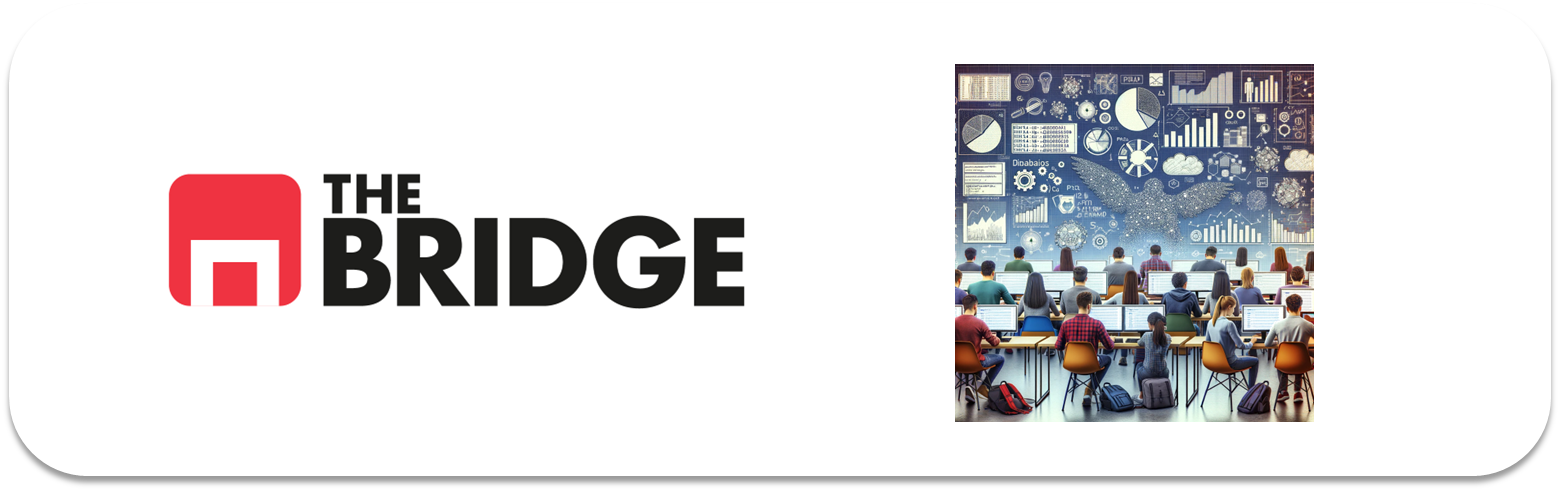

## TEAM CHALLENGE: TOOLBOX

Este notebook describe el Team Challenge dedicado a construir un módulo de herramientas básicas, o Toolbox, que os pueda servir de ayuda para resolver vuestros problemas de Machine Learning en el futuro. 

El objetivo es crear vuestro propio **módulo**, es decir, crear el conjunto de funciones que se describen a continuación y con ellas crear un script con nombre "toolbox_ML.py".

### Entregables
Por lo tanto, **se pide:**  
1. Entregar un script "toolbox_ML.py" que contenga el código comentado que implemente las funciones descritas y especificadas en el apartado "Funciones". La entrega se hará en el repositorio del grupo.  

2. Hacer una descripción del código creado en una breve presentación de 10-15 minutos, empleando para ello un ejemplo diseñado por el grupo.  

3. Entregar el código del ejemplo (esto debería ser un notebook, pero puede ser también un script) también en el repositorio del grupo.   

### Plazos
Tendremos 2 sesiones de team challenge para crear el código y una sesión de presentación.  

Debéis entregar en enlace al repositorio via mail a ta_ds_online@thebridgeschool.es el día anterior a la presentación (hora límite 17:00h)  

- Turno de mañana: Entrega 27 de mayo / Presentación 28 de mayo.  

- Turno de tarde: Entrega 29 de mayo / Presentación 30 de mayo.  



### Funciones

El objetivo de las funciones que se especifican a continuación es ayudar a realizar el análisis y selección de features de la forma más flexible y rápida posible, dado un problema de Machine Learning concreto.

**Todas las funciones deben llevar comentado el código y deben incluir un docstring especificando su uso**, según la siguiente guía:

Un "docstring" en Python es una cadena de texto utilizada para documentar módulos, clases, métodos y funciones. El propósito de un docstring es explicar brevemente qué hace la función y cómo se debe utilizar. Los docstrings se encierran entre tres comillas dobles (""") al inicio y al final, y se colocan justo después de la definición de la función. Aquí hay un formato típico de un docstring para una función en Python:

```python
def mi_funcion(param1, param2):
    """
    Descripción breve de lo que hace la función.

    Argumentos:
    param1 (tipo): Descripción de param1.
    param2 (tipo): Descripción de param2.

    Retorna:
    tipo: Descripción de lo que retorna la función.
    """
    
    # El cuerpo de la función va aquí
    pass
```

En este formato:

1. **Primera línea**: Breve descripción de la función.
2. **Sección de Argumentos**: Lista cada parámetro, su tipo esperado y una breve descripción de su propósito.
3. **Sección de Retorna**: Describe el tipo y el propósito del valor que la función retorna.



<span style="color: red;">
Utilizaremos un dataset que hemos visto durante el bootcamp y que incluye distintos tipos de variables/features, que pueden ser booleanas, nuémricas discretas, numéricas contínuas y categóricas.
</span>

In [1]:
import pandas as pd

df = pd.read_csv('data/Marketing-Customer-Analysis.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Funcion: describe_df

Esta función debe recibir como argumento un dataframe y debe devolver una dataframe como el de la imagen (NO el de la imagen). Es decir, un dataframe que tenga una columna por cada variable del dataframe original, y como filas los tipos de dichas variables, el tanto por ciento de valores nulos o missings, los valores únicos y el porcentaje de cardinalidad. 

La figura muestra el resultado esperado de llamar a la función con el dataset del Titanic:  

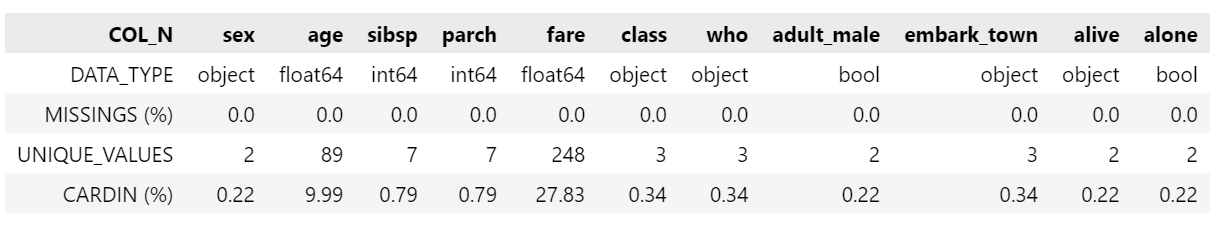
    

### Funcion: tipifica_variables

Esta función debe recibir como argumento un dataframe, un entero (`umbral_categoria`) y un float (`umbral_continua`). La función debe devolver un dataframe con dos columnas "nombre_variable", "tipo_sugerido" que tendrá tantas filas como columnas el dataframe. En cada fila irá el nombre de una de las columnas y una sugerencia del tipo de variable. Esta sugerencia se hará siguiendo las siguientes pautas:
+ Si la cardinalidad es 2, asignara "Binaria"
+ Si la cardinalidad es menor que `umbral_categoria` asignara "Categórica"
+ Si la cardinalidad es mayor o igual que `umbral_categoria`, entonces entra en juego el tercer argumento:
    * Si además el porcentaje de cardinalidad es superior o igual a `umbral_continua`, asigna "Numerica Continua"
    * En caso contrario, asigna "Numerica Discreta"


### Funcion: get_features_num_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad, además de un argumento 'umbral_corr', de tipo float que debe estar entre 0 y 1 y una variable float "pvalue" cuyo valor debe ser por defecto "None".

La función debe devolver una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr". Además si la variable "pvalue" es distinta de None, sólo devolvera las columnas numéricas cuya correlación supere el valor indicado y además supere el test de hipótesis con significación mayor o igual a 1-pvalue.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

### Funcion: plot_features_num_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un valor de correlación ("umbral_corr", con valor 0 por defecto) y un argumento ("pvalue") con valor "None" por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

EXTRA: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_regresion`

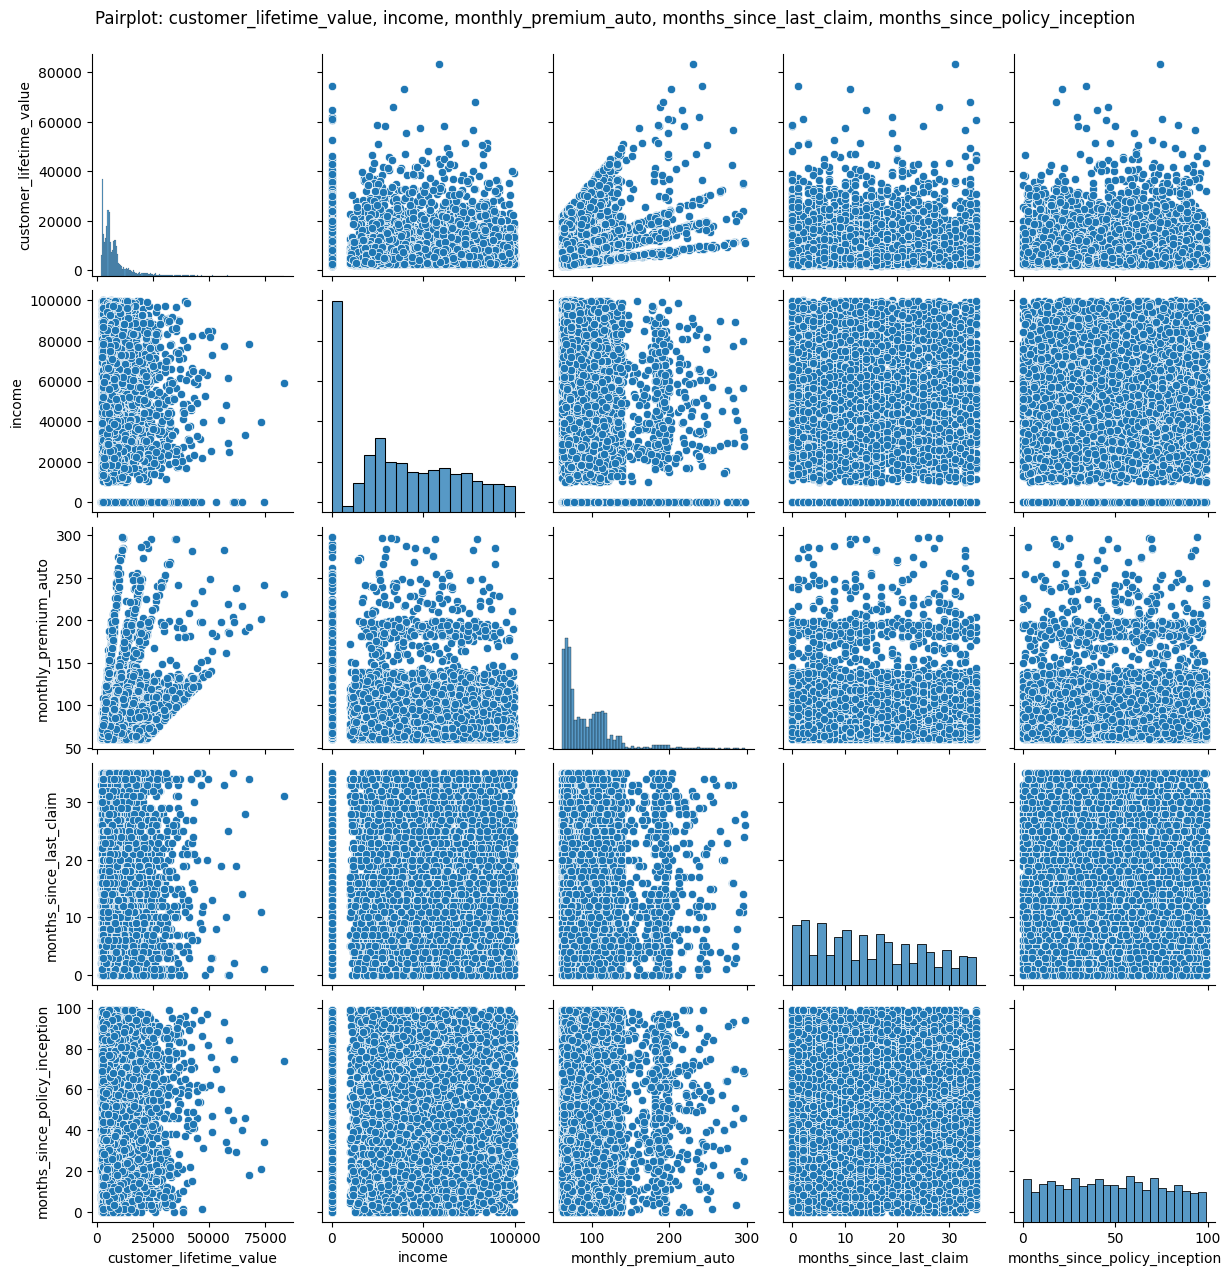

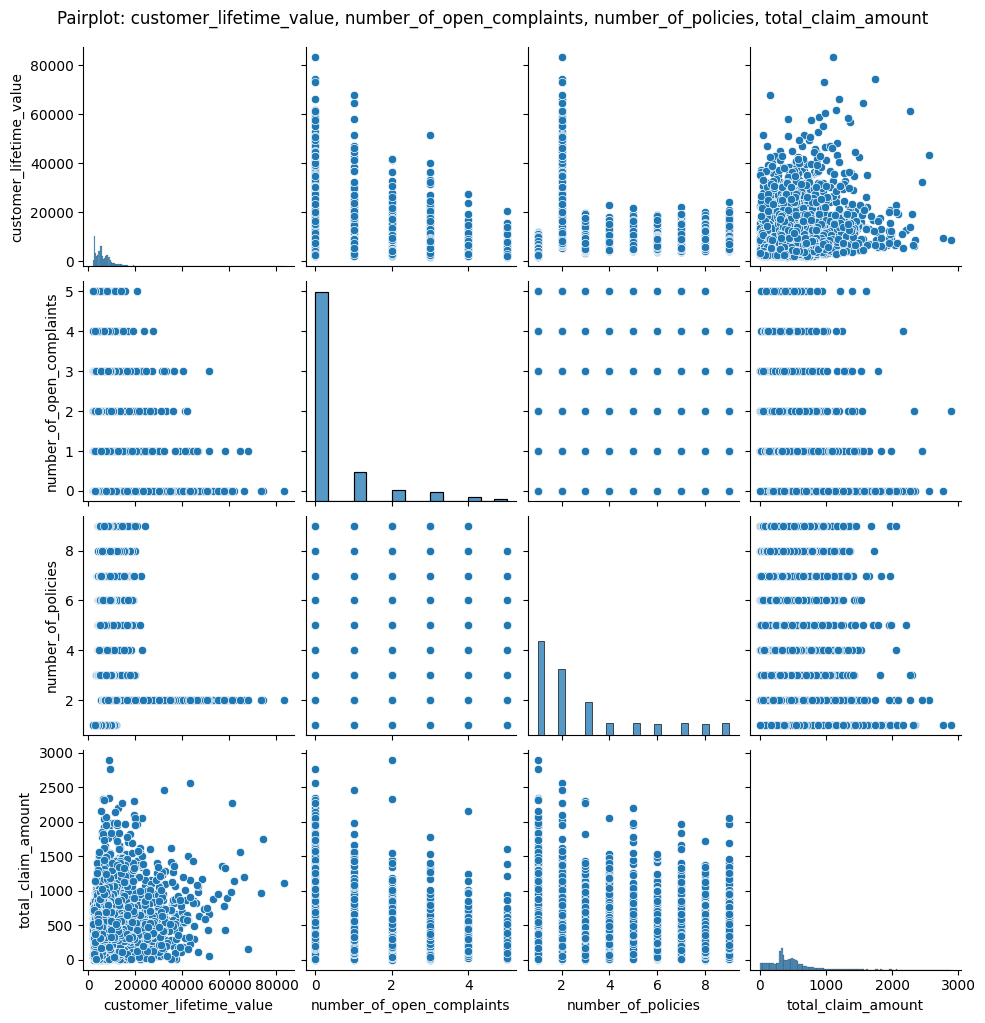

['income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [2]:
# 4. Funcion: plot_features_num_regression
from toolbox_ML import plot_features_num_regression

plot_features_num_regression(df, target_col = "customer_lifetime_value")

### Funcion: get_features_cat_regression



Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad y una variable float "pvalue" cuyo valor por defecto será 0.05.

La función debe devolver una lista con las columnas categóricas del dataframe cuyo test de relación con la columna designada por 'target_col' supere en confianza estadística el test de relación que sea necesario hacer (es decir la función debe poder escoger cuál de los dos test que hemos aprendido tiene que hacer).

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [3]:
# 5. get_features_cat_regresion
from toolbox_ML import get_features_cat_regression

cat_selected = get_features_cat_regression(df, target_col = "customer_lifetime_value")
cat_selected

['coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'marital_status',
 'renew_offer_type',
 'vehicle_class',
 'vehicle_size']

### Funcion: plot_features_cat_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("pvalue") con valor 0.05 por defecto y un argumento "with_individual_plot" a False.

Si la lista no está vacía, la función pintará los histogramas agrupados de la variable "target_col" para cada uno de los valores de las variables categóricas incluidas en columns que cumplan que su test de relación con "target_col" es significatio para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_regression`.

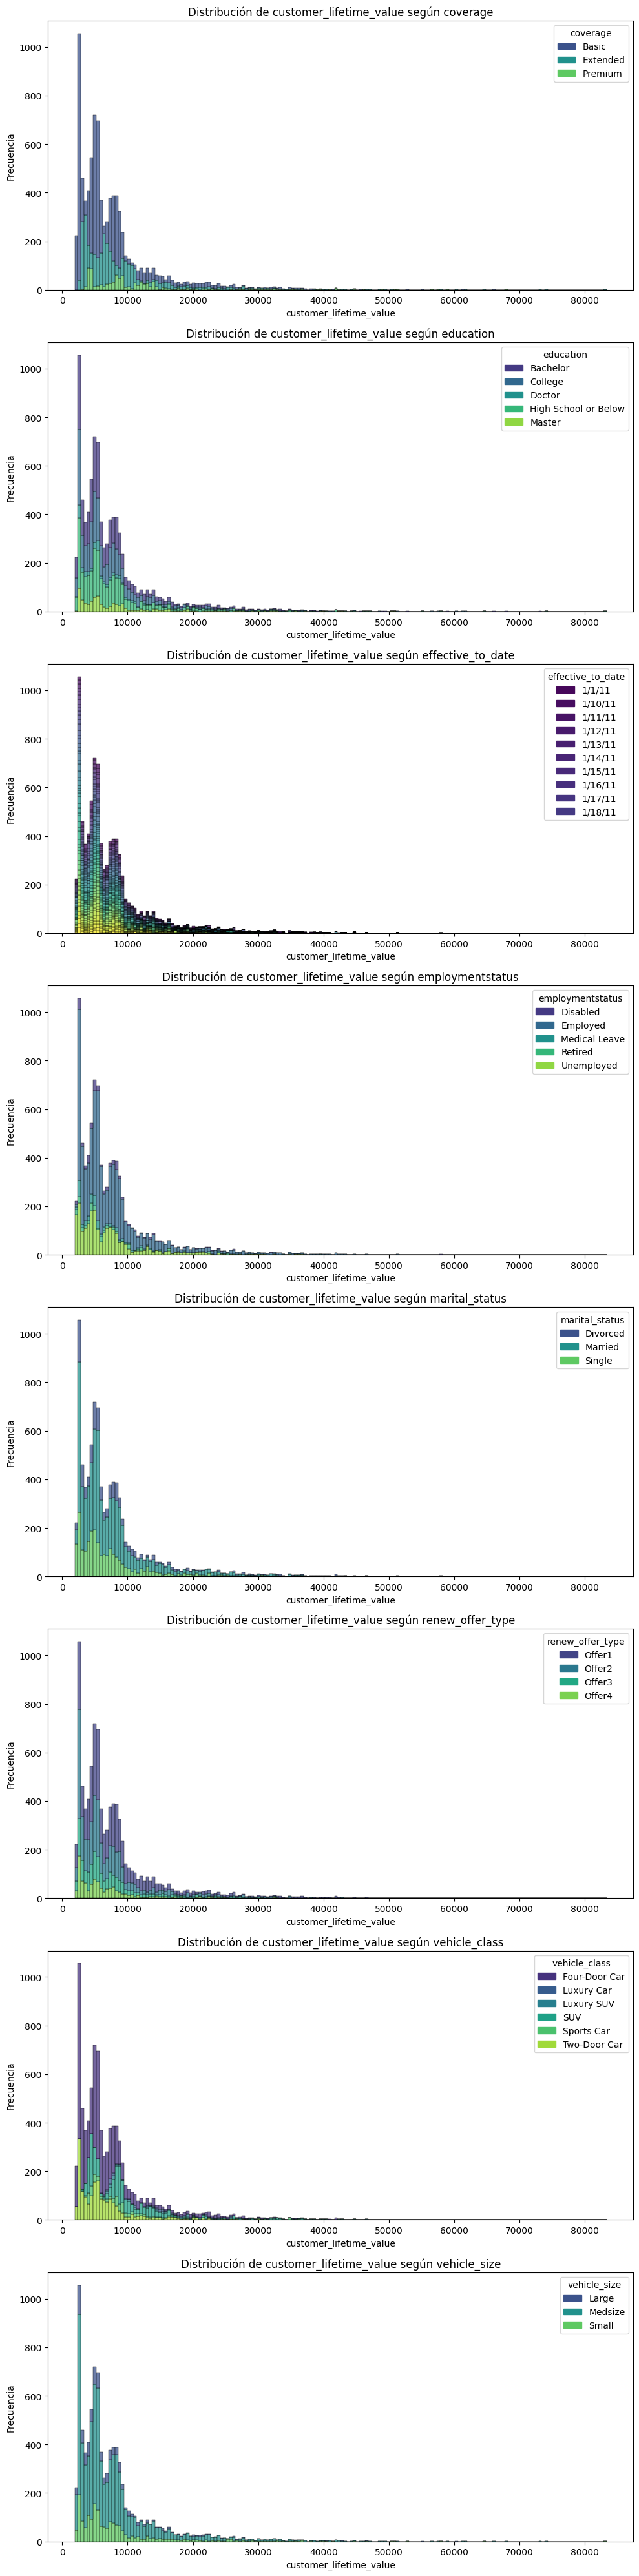

['coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'marital_status',
 'renew_offer_type',
 'vehicle_class',
 'vehicle_size']

In [4]:
# 6. plot_features_cat_regression
from toolbox_ML import plot_features_cat_regression

plot_features_cat_regression(df, target_col = "customer_lifetime_value" , columns = cat_selected, with_individual_plot= False)

### Consejos para la distribución del trabajo

Tened en cuenta que hay realmente dos trabajos: desarrollo de las funciones, desarrollo del ejemplo.

Diseñad entre todos el ejemplo (puede ser un dataset conocido al que vais a aplicar todas las funciones, en cuyo caso deberías ir saber que debería devolver cada función). Basícamente esto sería diseñar lo que se conocen como "Test" de las funciones.function

Encargad a uno el desarrollo y ejecución del test y el resto repartíos las funciones. A medida que vayáis teniendo las funciones hechas avisad al "testador" para que pueda ir probándolas y dando feedback. El testador mientras las funciones llegan puede diseñar el esqueleto y unas funciones dummies que se llamen igual que las pedidas y que devuelvan siempre un mismo resultado (ojo un resultado válido para lo que se le pide a cada función)

